# Classification Linear_Classifier and KNN using Tensorflow and Sklearn Respectively

In [1]:
#importing the essentials
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use("ggplot")

In [2]:
#loading the dataset
df = pd.read_csv(r"D:\AI-Datasets\knn-linear_classifier\diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#cleaning the data

#finding Nan or impossible values
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df_copy = df
unclean_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]
df_copy[unclean_features] = df[unclean_features].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

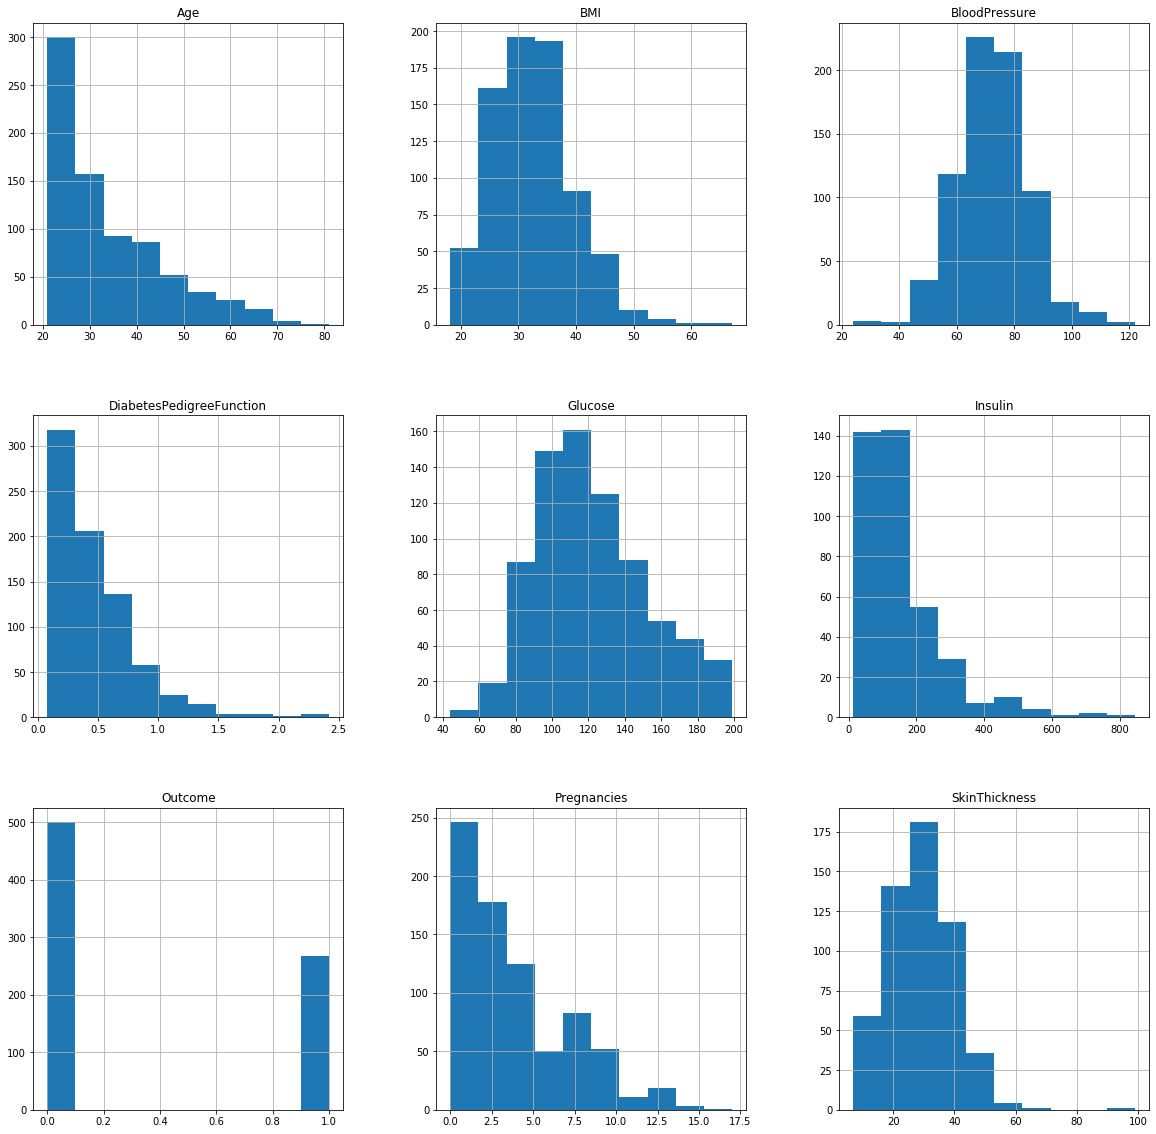

In [5]:
p = df.hist(figsize=(20,20))

In [6]:
for i in unclean_features:
    df_copy[i].fillna(df[i].mean(),inplace=True)

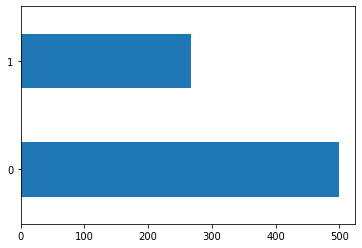

In [7]:
#observing the data
df.shape #outputs (768,9)
df["Outcome"].value_counts().plot(kind="barh")

In [8]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_features = pd.DataFrame(scaler.fit_transform(df_copy.drop(["Outcome"],axis=1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [9]:
df_features.head()
df_labels = df_copy["Outcome"]

In [88]:
#Training the data

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

test_score = []
train_score = []

x_train,x_test,y_train,y_test = train_test_split(df_features,df_labels,test_size = 0.1,stratify=df_labels,random_state=42)
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

c = train_score.index(max(train_score))
d = test_score.index(max(test_score))
print(train_score)
print(test_score)

[1.0, 0.8437047756874095, 0.8465991316931982, 0.8248914616497829, 0.8306801736613604, 0.8002894356005789, 0.804630969609262, 0.7930535455861071, 0.8031837916063675, 0.7945007235890015, 0.804630969609262, 0.7930535455861071, 0.7988422575976846, 0.784370477568741]
[0.7272727272727273, 0.7272727272727273, 0.7402597402597403, 0.7662337662337663, 0.8181818181818182, 0.8051948051948052, 0.7922077922077922, 0.7922077922077922, 0.8051948051948052, 0.8051948051948052, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7792207792207793]


In [89]:
#Predicting the data

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

[0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0]
158    0
484    1
712    1
535    1
205    0
      ..
78     1
767    0
410    0
554    0
81     0
Name: Outcome, Length: 77, dtype: int64
0.7792207792207793


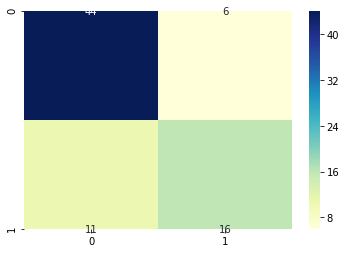

In [90]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(matrix),fmt="g",annot=True,cmap="YlGnBu")


In [92]:
# from tensorflow.v2.compat.feature_column as fc
feature_columns = []
numerical_column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction',"Age"]
for i in numerical_column:
    feature_columns.append(tf.feature_column.numeric_column(i,dtype=tf.float32))

In [93]:
def make_fn(features,labels,shuffle=True,batch_size=2,epochs=10):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(features),labels))
        if shuffle:
            ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_fn

train_input_fn = make_fn(x_train,y_train)
test_input_fn = make_fn(x_test,y_test)
# x_train.info()

In [94]:
linear_classifier = tf.estimator.LinearClassifier(feature_columns = feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmpadrwt9v_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023277B70F48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [95]:
linear_classifier.train(train_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\admin\AppData\Local\Temp\tmpadrwt9v_\model.ckpt.
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 590.834
INFO:tensorflow:loss = 1.1870085, step = 100 (0.171 sec)
INFO:tensorflow:global_ste

In [96]:
result = linear_classifier.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-14T10:35:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpadrwt9v_\model.ckpt-3460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-14-10:35:49
INFO:tensorflow:Saving dict for global step 3460: accuracy = 0.72727275, accuracy_baseline =

In [97]:
print(result["accuracy"])

0.72727275


# Using DNN to classify 

In [100]:
dnn = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[30,10],n_classes=2)
dnn.train(train_input_fn,steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmp3tcvulcq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002327BEE1308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:C

In [101]:
dnn.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-14T10:42:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmp3tcvulcq\model.ckpt-3460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-14-10:42:47
INFO:tensorflow:Saving dict for global step 3460: accuracy = 0.72727275, accuracy_baseline =

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8055556,
 'auc_precision_recall': 0.69267946,
 'average_loss': 0.5690045,
 'label/mean': 0.35064936,
 'loss': 0.5661642,
 'precision': 0.61538464,
 'prediction/mean': 0.43636614,
 'recall': 0.5925926,
 'global_step': 3460}